# Tredence Batches 1 & 2 Capstone: BNPL 

## Part 1 - EDA and Data Engineering

In [1]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('./datasets/Mobileusebasedata.csv')

In [2]:
# How many entries(Rows) and attributes(Columns) are present in the data? What is the shape of the data?
# Write your Code here.
dataset.shape

(50000, 12)

In [3]:
# Display the first 5 entries of the dataset.
# Write your Code here.
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
# What are the different features available in the dataset?
# Write your Code here.
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [5]:
# Disply the distribution of Numerical Variables.
# Write your Code here.
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# First set of Feature Cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

### Plotting Dataset
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [7]:
dataset2.isna().sum().sum()
# No missing values 

0

<AxesSubplot:title={'center':'Correlation with Reposnse variable'}>

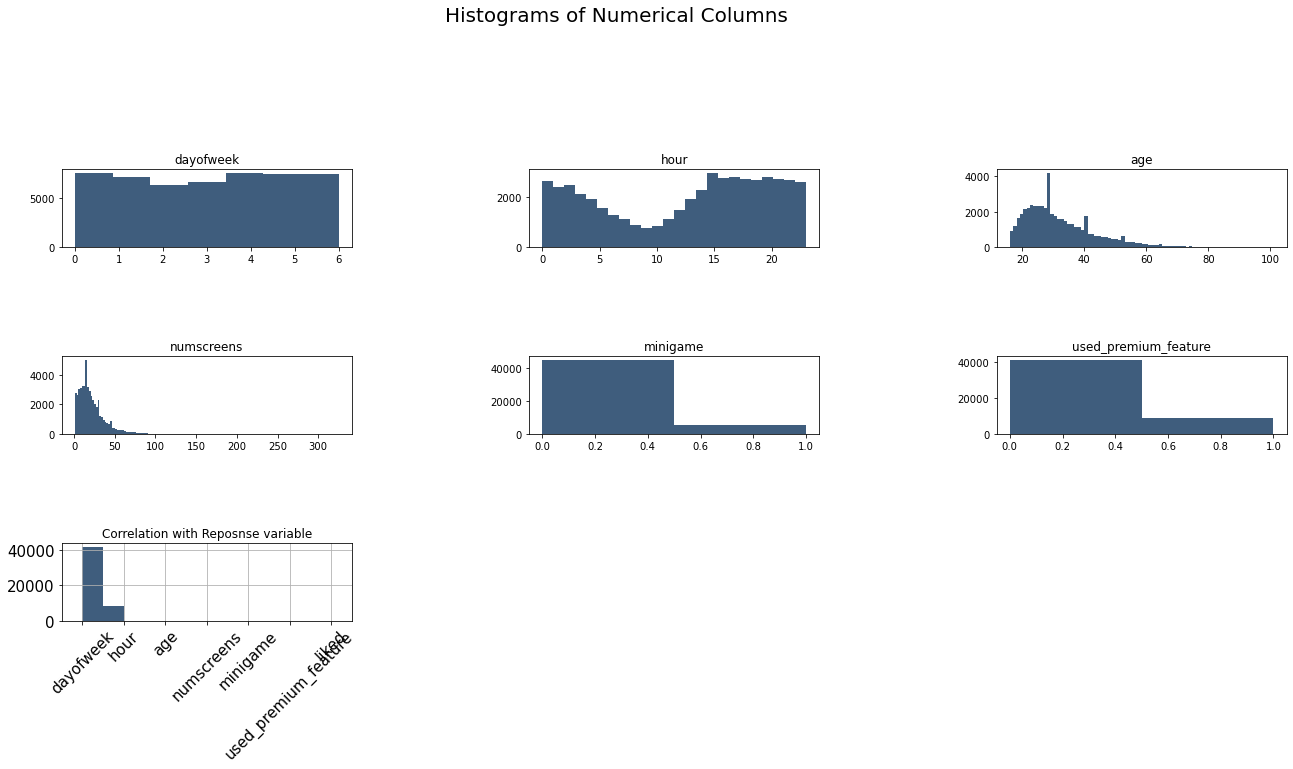

In [8]:
## Histograms - Part of Question 1
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('app_data_hist.jpg')

## Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

In [9]:
#Added extra
numscreens_data=pd.DataFrame(dataset.numscreens.sort_values(ascending=False))

print(numscreens_data)


       numscreens
27660         325
46169         247
22975         243
12723         234
10834         216
...           ...
3206            1
6534            1
24656           1
2183            1
36829           1

[50000 rows x 1 columns]


In [10]:
print(dataset2.minigame.value_counts())
print(dataset2.used_premium_feature.value_counts())




0    44609
1     5391
Name: minigame, dtype: int64
0    41399
1     8601
Name: used_premium_feature, dtype: int64


<AxesSubplot:title={'center':'Correlation with Response variable'}>

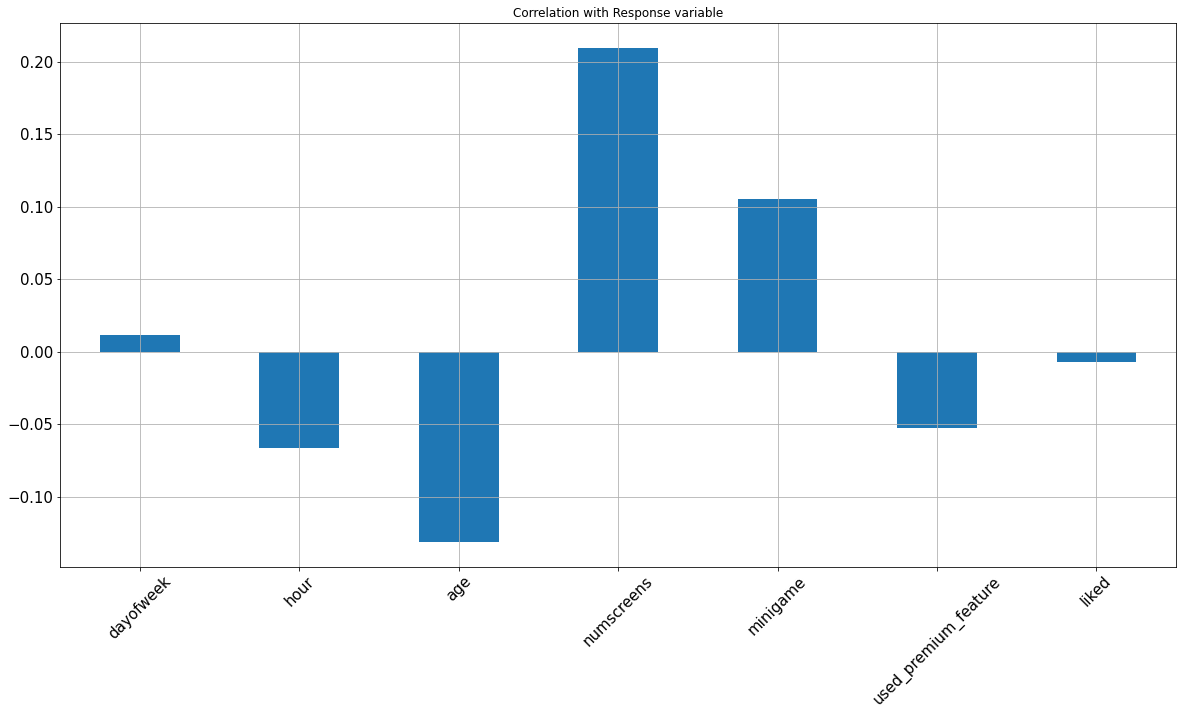

In [12]:
#dataset2.corrwith(dataset.enrolled)
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Response variable',
                  fontsize = 15, rot = 45,
                  grid = True)

### Perform an EDA explanation for the Histograms in under 10 lines. What can you conclude from them? 

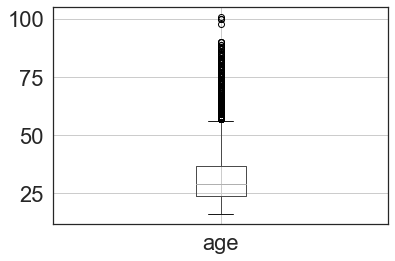

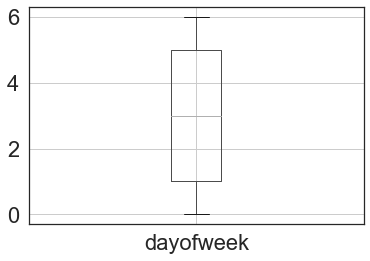

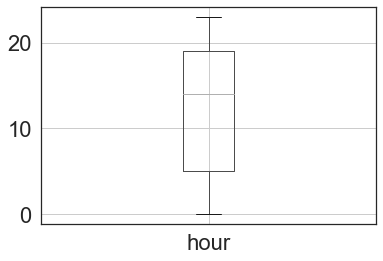

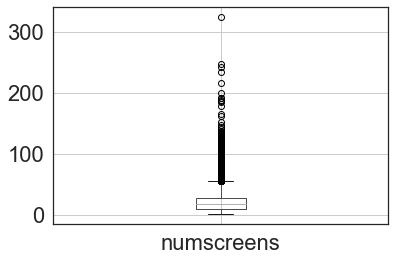

In [46]:
Numerical_cols=['age','dayofweek','hour','numscreens']
df=dataset.copy()
for column in df[Numerical_cols]:
    plt.figure()
    df.boxplot([column])
    plt.show()

In [47]:
df[['numscreens','screen_list']].head()

,numscreens,screen_list
0,15,"idscreen,joinscreen,Cycle,product_review,ScanP..."
1,13,"joinscreen,product_review,product_review2,Scan..."
2,3,"Splash,Cycle,Loan"
3,40,"product_review,Home,product_review,Loan3,Finan..."
4,32,"idscreen,joinscreen,Cycle,Credit3Container,Sca..."


Percentiles: 25th=24.000, 75th=37.000, IQR=13.000
Identified outliers: 1639
Non-outlier observations: 48361


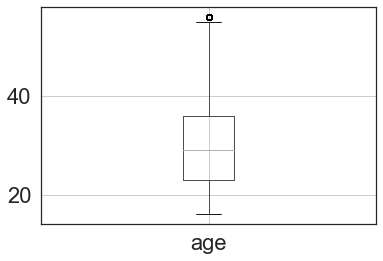

Percentiles: 25th=1.000, 75th=5.000, IQR=4.000
Identified outliers: 0
Non-outlier observations: 48361


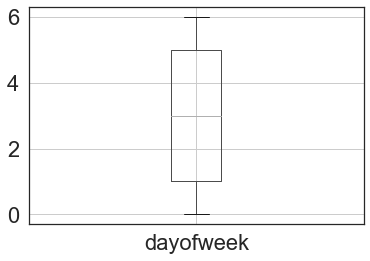

Percentiles: 25th=5.000, 75th=19.000, IQR=14.000
Identified outliers: 0
Non-outlier observations: 48361


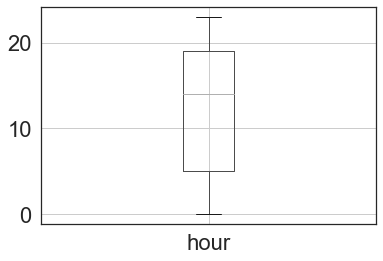

Percentiles: 25th=10.000, 75th=28.000, IQR=18.000
Identified outliers: 1825
Non-outlier observations: 46536


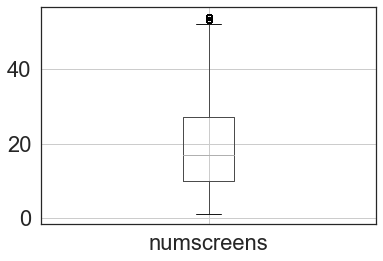

In [48]:

# Removing outlier
df_new=df[Numerical_cols]
from numpy import percentile
# calculate interquartile range
for column in df_new.columns:
    q25, q75 = percentile(df_new[column], 25), percentile(df_new[column], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers    
    outliers = [x for x in df_new[column] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers 
    outliers_removed = [x for x in df_new[column] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    df_new = df_new[df_new[column] < upper]
    plt.figure()
    df_new.boxplot([column])
    plt.show()



In [49]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

In [50]:
# Compute the Correlation Matrix
corr = dataset2.corr()

In [51]:
print(corr)

                      dayofweek      hour       age  numscreens  minigame  \
dayofweek              1.000000  0.013249 -0.012326    0.007925 -0.008631   
hour                   0.013249  1.000000  0.018859   -0.076756 -0.009120   
age                   -0.012326  0.018859  1.000000   -0.128739  0.019745   
numscreens             0.007925 -0.076756 -0.128739    1.000000  0.041154   
minigame              -0.008631 -0.009120  0.019745    0.041154  1.000000   
used_premium_feature   0.001439  0.022553  0.004301    0.061972  0.108780   
liked                 -0.005737 -0.001725 -0.002593   -0.007349 -0.012250   

                      used_premium_feature     liked  
dayofweek                         0.001439 -0.005737  
hour                              0.022553 -0.001725  
age                               0.004301 -0.002593  
numscreens                        0.061972 -0.007349  
minigame                          0.108780 -0.012250  
used_premium_feature              1.000000  0.001690 

In [52]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

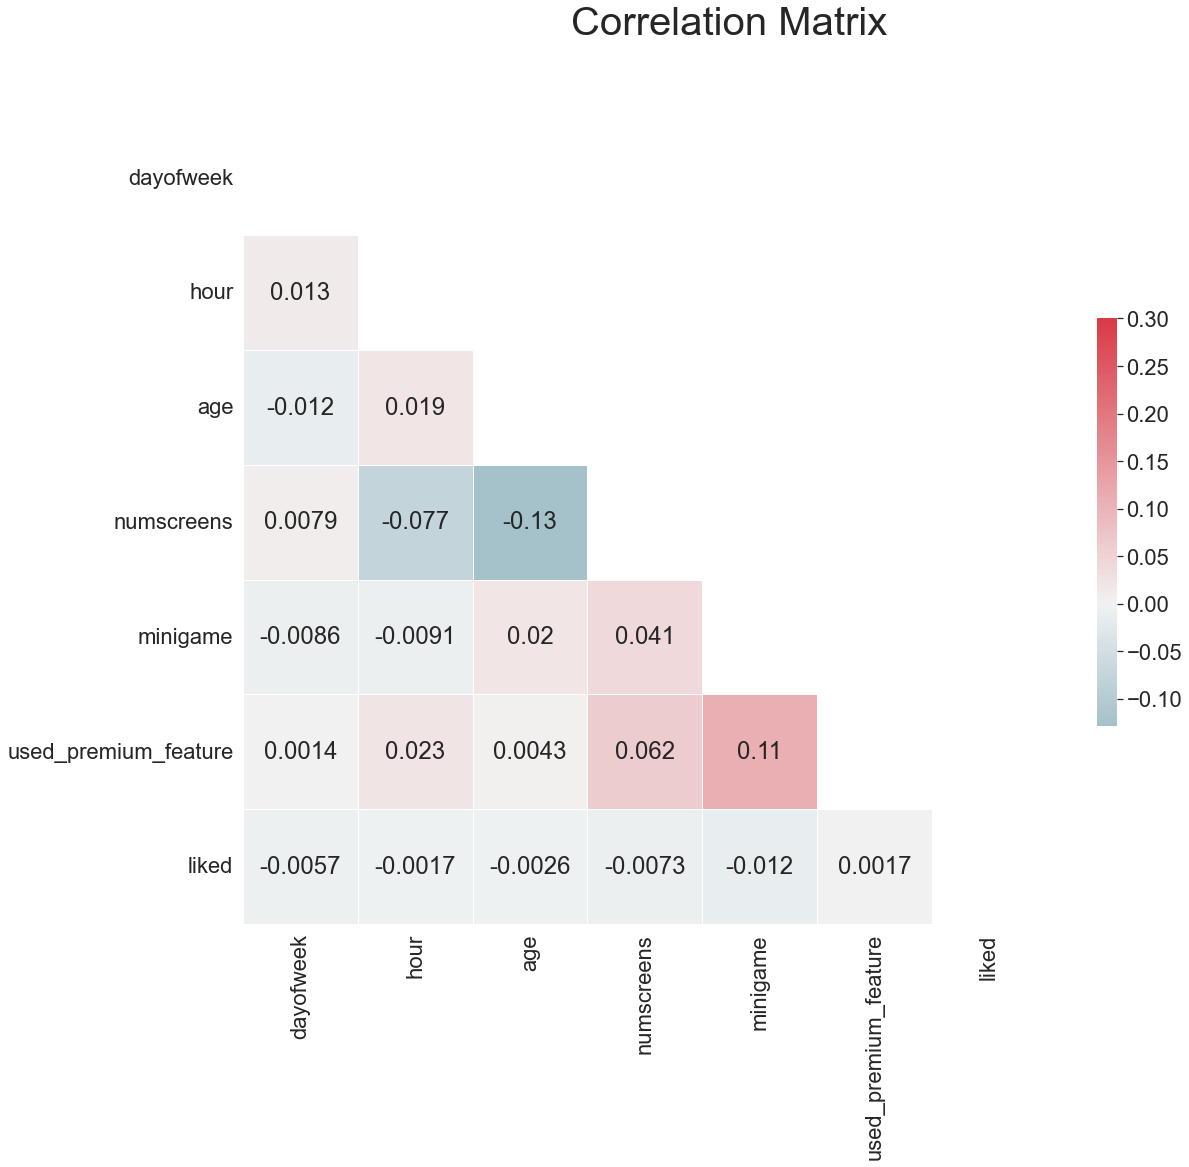

In [53]:
# Generate a mask for the upper triangle - Part of question 1
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### Perform an EDA explanation for the Correlation Matrix in under 10 lines. What can you conclude from them? 

In [54]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [55]:
dataset.sample(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
42528,187394,2013-03-12 15:57:37.913,1,15,41,"joinscreen,ScanPreview,VerifyCountry,VerifySSN...",7,0,1,1,2013-03-12 18:52:40.365,0
40219,239608,2013-03-02 18:41:21.758,5,18,28,"idscreen,joinscreen,Cycle,product_review,produ...",28,0,0,1,2013-03-05 17:33:25.581,1
38732,235425,2013-05-23 22:44:34.505,3,22,20,"Splash,Home,Loan2,Institutions,Credit3Containe...",9,0,0,0,NaT,1
26874,216383,2013-01-13 02:57:46.237,6,2,27,ScanPreview,1,0,0,1,2013-01-13 03:14:57.157,0
24429,285004,2013-02-17 13:59:52.448,6,13,45,"Home,Loan2,Institutions,CC1,product_review,pro...",11,0,0,0,NaT,0
36600,147191,2013-04-29 09:47:53.072,0,9,24,"product_review,product_review,product_review,V...",10,0,0,1,2013-04-29 09:50:07.648,0
24291,208419,2012-12-01 15:00:00.375,5,15,29,"Credit3Container,ScanPreview,VerifyMobile,Veri...",14,0,0,0,NaT,0
46519,86985,2013-02-24 04:05:08.296,6,4,54,Splash,1,0,0,1,2013-04-01 23:11:12.608,0
30696,55971,2013-04-05 19:11:50.322,4,19,21,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",34,0,0,1,2013-04-05 19:12:46.129,0
22140,276781,2013-03-14 07:42:56.869,3,7,28,"idscreen,joinscreen,Home,Loan2,Institutions,Cr...",35,0,0,1,2013-03-14 07:43:50.946,0


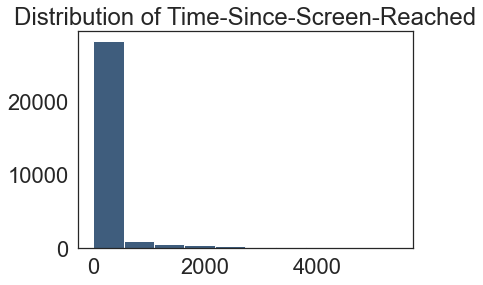

In [56]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

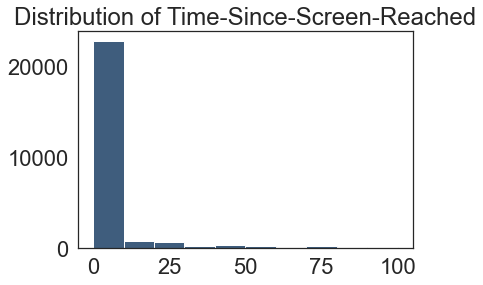

In [57]:

plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [58]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0 # Give two days or 48 Hrs. to enroll in BNPL feature else ignore User
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [60]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('./datasets/most_used_screens.csv').top_screens.values
top_screens

# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [63]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [64]:
# Funnels - Funnel is a concept in app marketing that breaks down the user journey 
#from noticing an app to becoming a loyal and valuable user.
# you can also think of it as a collection of screens used and opened by the user
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [65]:
dataset.sample(10)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount
31920,293356,2,20,34,10,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
10500,368694,2,22,24,23,0,0,1,0,0,...,0,0,0,0,0,0,0,13,0,0
8040,232234,1,9,27,40,0,1,0,1,1,...,0,0,0,0,0,0,0,11,0,0
5112,345843,1,18,39,20,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
31146,340841,5,0,42,23,1,0,1,0,1,...,0,0,0,0,0,0,0,7,0,0
41665,165808,0,13,55,20,0,0,1,0,1,...,0,0,0,0,0,0,0,6,0,2
41504,105319,0,19,42,19,1,0,1,0,0,...,0,0,0,0,0,0,0,12,0,2
38211,75399,2,7,27,55,0,0,0,0,0,...,0,0,0,1,0,0,0,11,0,1
22146,14877,4,3,25,28,0,0,1,0,1,...,1,0,0,0,0,0,0,9,0,3
17197,340515,3,13,27,21,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,4


In [66]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [67]:
dataset.sample(10)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
3418,317467,4,19,49,24,1,1,0,1,0,...,0,0,0,0,0,3,5,0,0,1
42977,14845,6,16,28,16,0,0,1,0,1,...,0,0,0,1,0,6,0,3,0,0
30569,228065,3,13,53,31,1,1,1,0,1,...,0,0,0,0,0,10,0,1,0,1
18882,216886,2,16,39,21,0,0,1,0,1,...,0,0,0,0,0,6,0,0,0,1
11091,27880,5,2,23,15,0,1,1,0,0,...,0,0,0,0,0,10,0,0,0,0
36508,11660,5,18,21,14,0,0,1,0,1,...,0,0,0,0,0,4,0,3,0,0
7697,75686,3,1,53,32,0,0,1,0,0,...,0,0,0,0,0,12,0,3,0,1
6369,126204,5,4,27,27,0,1,1,0,1,...,0,0,0,0,0,11,0,4,0,1
45410,371803,2,12,23,36,0,0,1,1,1,...,0,0,0,0,0,13,0,1,0,1
34398,71942,5,17,26,32,0,1,0,0,1,...,0,0,0,0,0,8,0,1,0,1


In [68]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('mobileusebasedata_engineered.csv', index = False)

In [69]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


## Part 2 - Model Creation and Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

dataset = pd.read_csv('./datasets/mobileusebasedata_engineered.csv')

In [2]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [3]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [4]:
# Splitting Independent and Response Variables
response = dataset["enrolled"] # This is label
dataset = dataset.drop(columns="enrolled") # Note the drop --> This are our features

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [5]:
response.value_counts()
# Target data is balanced


0    25150
1    24850
Name: enrolled, dtype: int64

In [6]:
# Removing Identifiers, we remove user column as it is of no significance for our classification
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [80]:
# Model 1 classifier - Question 3

#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

'''
# Start of code
classifier = 
# end of code
'''
classifier=LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

In [81]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report

cm = confusion_matrix(y_test, y_pred)
print('For Logistic regression \n ')
print('Accuracy score',accuracy_score(y_test, y_pred))
print('Precision Score ',precision_score(y_test, y_pred)) # tp / (tp + fp)
print('Recall score', recall_score(y_test, y_pred)) # tp / (tp + fn)
'''
# start of code
f1_score()
# Fill the code in fi score
# end of code
'''

print('F1 Score',f1_score(y_test, y_pred, average='binary')) # since its only 0 1 classification
print(cm)

print(classification_report(y_test, y_pred))


For Logistic regression 
 
Accuracy score 0.7683
Precision Score  0.7620959646657298
Recall score 0.7702922077922078
F1 Score 0.7661721667171258
[[3887 1185]
 [1132 3796]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



Test Data Accuracy: 0.7683


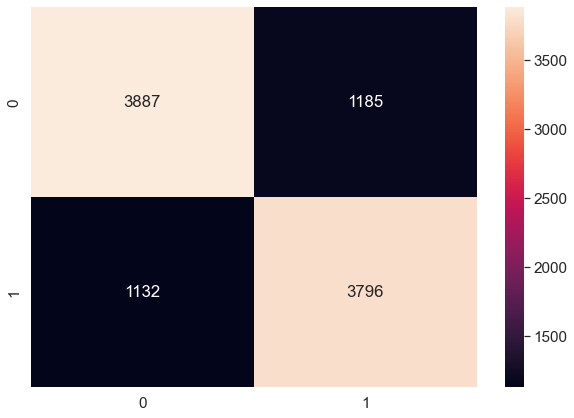

In [82]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [83]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.767 (+/- 0.009)


In [84]:
## Grid Search (Round 1) - Question 4 
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [85]:
# Combine Parameters
from sklearn.model_selection import RepeatedStratifiedKFold



'''
# start of codes - 2 lines

parameters=
grid_search= 

# end of codes - 2 lines
'''
space = dict()
space['penalty'] = penalty
space['C'] = C
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(classifier, space, scoring='accuracy', n_jobs=-1, cv=cv)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 90.56 seconds


In [86]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.7671666666666667, {'C': 10, 'penalty': 'l2'})

In [87]:
## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [ 1, 2, 5,8,10,15,20]

# Combine Parameters

'''
# start of codes - 2 lines

parameters=
grid_search= 

# end of codes - 2 lines
'''

space = dict()
space['penalty'] = penalty
space['C'] = C
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(classifier, space, scoring='accuracy', n_jobs=-1, cv=cv)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

Took 106.20 seconds


0.7671666666666667

In [89]:
print(rf_best_accuracy, rf_best_parameters)

0.7671666666666667 {'C': 10, 'penalty': 'l2'}


In [90]:
classifier=LogisticRegression(max_iter=10000,C=10,penalty='l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

In [91]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [92]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Gradient boosting algoritm


In [8]:
# Model 1 classifier - Question 3

#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

'''
# Start of code
classifier = 
# end of code
'''

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=40, max_depth=7, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
# after playing with parameters of max features max depth etc finalised above parameters with learning rate 0.25 as 
# best parameters


Learning rate:  0.05
Accuracy score (training): 0.789
Accuracy score (validation): 0.784
Learning rate:  0.075
Accuracy score (training): 0.790
Accuracy score (validation): 0.784
Learning rate:  0.1
Accuracy score (training): 0.793
Accuracy score (validation): 0.785
Learning rate:  0.25
Accuracy score (training): 0.809
Accuracy score (validation): 0.786
Learning rate:  0.5
Accuracy score (training): 0.826
Accuracy score (validation): 0.779
Learning rate:  0.75
Accuracy score (training): 0.832
Accuracy score (validation): 0.772
Learning rate:  1
Accuracy score (training): 0.837
Accuracy score (validation): 0.762


In [10]:
classifier=GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=40, max_depth=7, random_state=0)
classifier.fit(X_train, y_train)
# Predicting Test Set
y_pred = classifier.predict(X_test)


In [11]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report

cm = confusion_matrix(y_test, y_pred)
print('For Gradient Boosting \n ')
print('Accuracy score',accuracy_score(y_test, y_pred))
print('Precision Score ',precision_score(y_test, y_pred)) # tp / (tp + fp)
print('Recall score', recall_score(y_test, y_pred)) # tp / (tp + fn)
'''
# start of code
f1_score()
# Fill the code in fi score
# end of code
'''

print('F1 Score',f1_score(y_test, y_pred, average='binary')) # since its only 0 1 classification
print(cm)

print(classification_report(y_test, y_pred))


For Gradient Boosting 
 
Accuracy score 0.7856
Precision Score  0.8036649214659686
Recall score 0.747564935064935
F1 Score 0.7746005046257358
[[4172  900]
 [1244 3684]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      5072
           1       0.80      0.75      0.77      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



Test Data Accuracy: 0.7856


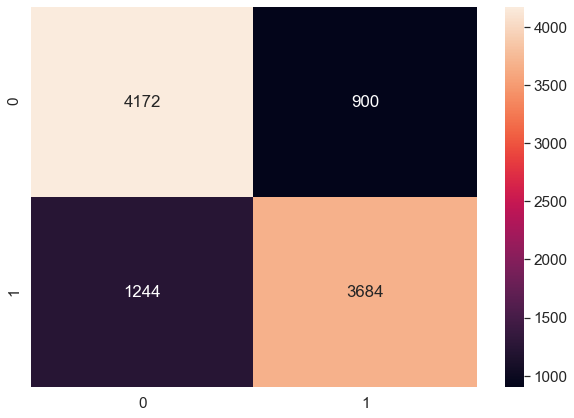

In [12]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [13]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.783 (+/- 0.012)


In [15]:
## Grid Search (Round 1) - Question 4 
from sklearn.model_selection import GridSearchCV

# Select Learning rate
# Create  hyperparameter space

lr_list = [0.05, 0.1, 0.5, 0.75, 1]

#max_features=[10,30,50]
#max_depth=[2,5,10]

#n_estimators=[10,20,40]



In [129]:
# Combine Parameters
from sklearn.model_selection import RepeatedStratifiedKFold

# since penalty and C parameters are only available on logistic regression
classifier=GradientBoostingClassifier()


space = dict()
space['learning_rate'] = lr_list
#space['max_features'] = max_features
#space['max_depth'] = max_depth
#space['n_estimators'] = n_estimators

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(classifier, space, scoring='accuracy', n_jobs=-1, cv=cv)
t0 = time.time()
grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 267.73 seconds


In [130]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.7826916666666667, {'learning_rate': 0.25})

In [131]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
## Grid Search (Round 2)
from sklearn.model_selection import RepeatedStratifiedKFold

# since penalty and C parameters are only available on logistic regression
classifier=GradientBoostingClassifier()


# Select Regularization Method

# Create regularization hyperparameter space
n_estimators = [10,20,30,40,50]
learning_rate =[0.25] #0.25 was selected from the above GridSearch results


# # Combine Parameters

# '''
# # start of codes - 2 lines

# parameters=
# grid_search= 

# # end of codes - 2 lines
# '''

space = dict()
space['n_estimators'] = n_estimators
space['learning_rate'] = learning_rate
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(classifier, space, scoring='accuracy', n_jobs=-1, cv=cv)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
print(rf_best_accuracy, rf_best_parameters)
grid_search.best_score_

Took 342.10 seconds
0.7802250000000001 {'learning_rate': 0.25, 'n_estimators': 50}


0.7802250000000001

In [17]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [18]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


# Ada boost classifier

In [135]:
# Model 1 classifier - Question 3

#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Ada boost classifiefer 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,2,5,10,20]
#base_estimator=LogisticRegression()
for learning_rate in lr_list:
    abc_clf = AdaBoostClassifier( n_estimators=20, learning_rate=learning_rate,random_state=0)
    abc_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(abc_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(abc_clf.score(X_test, y_test)))
# after playing with parameters of max features max depth etc finalised above parameters with learning rate 0.75 as 
# best parameters


Learning rate:  0.05
Accuracy score (training): 0.723
Accuracy score (validation): 0.720
Learning rate:  0.075
Accuracy score (training): 0.728
Accuracy score (validation): 0.724
Learning rate:  0.1
Accuracy score (training): 0.729
Accuracy score (validation): 0.725
Learning rate:  0.25
Accuracy score (training): 0.746
Accuracy score (validation): 0.741
Learning rate:  0.5
Accuracy score (training): 0.760
Accuracy score (validation): 0.752
Learning rate:  0.75
Accuracy score (training): 0.762
Accuracy score (validation): 0.760
Learning rate:  1
Accuracy score (training): 0.762
Accuracy score (validation): 0.759
Learning rate:  2
Accuracy score (training): 0.723
Accuracy score (validation): 0.720
Learning rate:  5
Accuracy score (training): 0.277
Accuracy score (validation): 0.280
Learning rate:  10
Accuracy score (training): 0.277
Accuracy score (validation): 0.280
Learning rate:  20
Accuracy score (training): 0.277
Accuracy score (validation): 0.280


In [136]:
classifier=AdaBoostClassifier(n_estimators=20, learning_rate=0.75, random_state=0)
classifier.fit(X_train, y_train)
# Predicting Test Set
y_pred = classifier.predict(X_test)


In [137]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report

cm = confusion_matrix(y_test, y_pred)
print('For Ada  Boosting \n ')
print('Accuracy score',accuracy_score(y_test, y_pred))
print('Precision Score ',precision_score(y_test, y_pred)) # tp / (tp + fp)
print('Recall score', recall_score(y_test, y_pred)) # tp / (tp + fn)
'''
# start of code
f1_score()
# Fill the code in fi score
# end of code
'''

print('F1 Score',f1_score(y_test, y_pred, average='binary')) # since its only 0 1 classification
print(cm)

print(classification_report(y_test, y_pred))


For Ada  Boosting 
 
Accuracy score 0.7598
Precision Score  0.7507942811755361
Recall score 0.7672483766233766
F1 Score 0.7589321557607387
[[3817 1255]
 [1147 3781]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5072
           1       0.75      0.77      0.76      4928

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



Test Data Accuracy: 0.7598


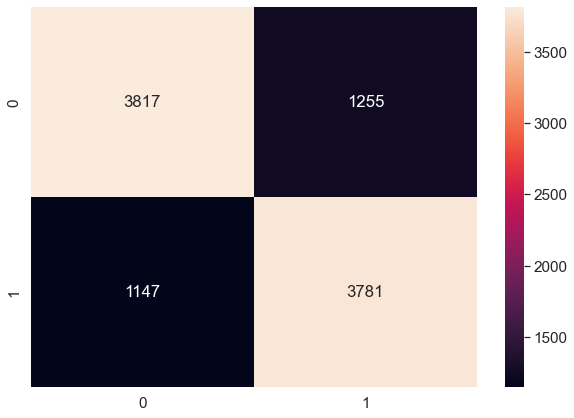

In [138]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [139]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.760 (+/- 0.010)


In [22]:
## Grid Search (Round 1) - Question 4 
from sklearn.model_selection import GridSearchCV

# Create  hyperparameter space

from sklearn.base import clone


In [141]:
ada_logr = AdaBoostClassifier(LogisticRegression(max_iter=1000))
logr = clone(ada_logr)
logr.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [142]:
# Combine Parameters
from sklearn.model_selection import RepeatedStratifiedKFold

# since penalty and C parameters are only available on logistic regression

param_grid = {'base_estimator__C' :[0.01, 0.1, 1, 10, 100, 1000],
              'n_estimators' :[ 30],
              'learning_rate' :[ 0.75],
             'base_estimator__penalty':['l1','l2']}


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


logr_grid = GridSearchCV(estimator=logr,
                        param_grid=param_grid,
                        cv=cv,
                        scoring='roc_auc',
                        return_train_score=True,
                        n_jobs=4,
                        verbose=1)



t0 = time.time()
grid_search=logr_grid.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

logr_best_mod = logr_grid.best_estimator_

Fitting 30 folds for each of 12 candidates, totalling 360 fits


/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tirumalarevanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Took 179.01 seconds


In [143]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.839981215716414,
 {'base_estimator__C': 100,
  'base_estimator__penalty': 'l2',
  'learning_rate': 0.75,
  'n_estimators': 30})

In [26]:

classifier=AdaBoostClassifier(base_estimator=LogisticRegression(C=100,penalty='l2',max_iter=1000),
                              n_estimators=30, 
                              learning_rate=0.75,
                              random_state=0)
classifier.fit(X_train, y_train)
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [27]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [28]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

